# Data Classification

[Open notebook in google colab](https://colab.research.google.com/github/moharamfatema/data-classification-ml-python/blob/main/classification.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
url='https://drive.google.com/file/d/1Y2-FuthGBfCqKUhCyWTIt0w8danWx6vm/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [18]:
df.columns = ['fLength',
              'fWidth',
              'fSize',
              'fConc',
              'fConc1', 
              'fAsym',
              'fM3Long',
              'fM3Trans',
              'fAlpha',
              'fDist',
              'classified']
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,classified
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [19]:
df['classified'].value_counts()

g    12331
h     6688
Name: classified, dtype: int64

In [20]:
df = df.groupby('classified')
df = df.apply(lambda x: x.sample(df.size().min()).reset_index(drop=True))
df['classified'].value_counts()

g    6688
h    6688
Name: classified, dtype: int64

In [24]:
test = df.sample(frac=0.3)
train = df.drop(test.index)

print('train samples =', train.shape[0],
      '\ntest samples =', test.shape[0],
      '\ntotal =', train.shape[0] + test.shape[0])

train samples = 9363 
test samples = 4013 
total = 13376


In [25]:
Y = train['classified']
X = train.drop('classified', axis=1)

In [71]:
def cross_validation(estimator, X, y):
    scoring = ['precision_macro',
               'recall_macro',
               'f1_macro',
               'accuracy']
    
    scores = cross_validate(estimator, X, y, scoring=scoring, n_jobs=-1, return_estimator=True)
    
    plt.figure(figsize=(30, 20))
    plt.rcParams['font.size'] = '30'
    plt.plot(scores['test_precision_macro'], label='precision')
    plt.plot(scores['test_recall_macro'], label='recall')
    plt.plot(scores['test_f1_macro'], label='F1 score')
    plt.plot(scores['test_accuracy'], label='accuracy')
    plt.legend()
    plt.show()
    
    for est in scores['estimator']:
        predictions = est.predict(X)
        labels = est.classes_
        cm = confusion_matrix(y, predictions, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=labels)
        plt.figure()
        disp.plot()
        plt.show()
    
    return scores['estimator']

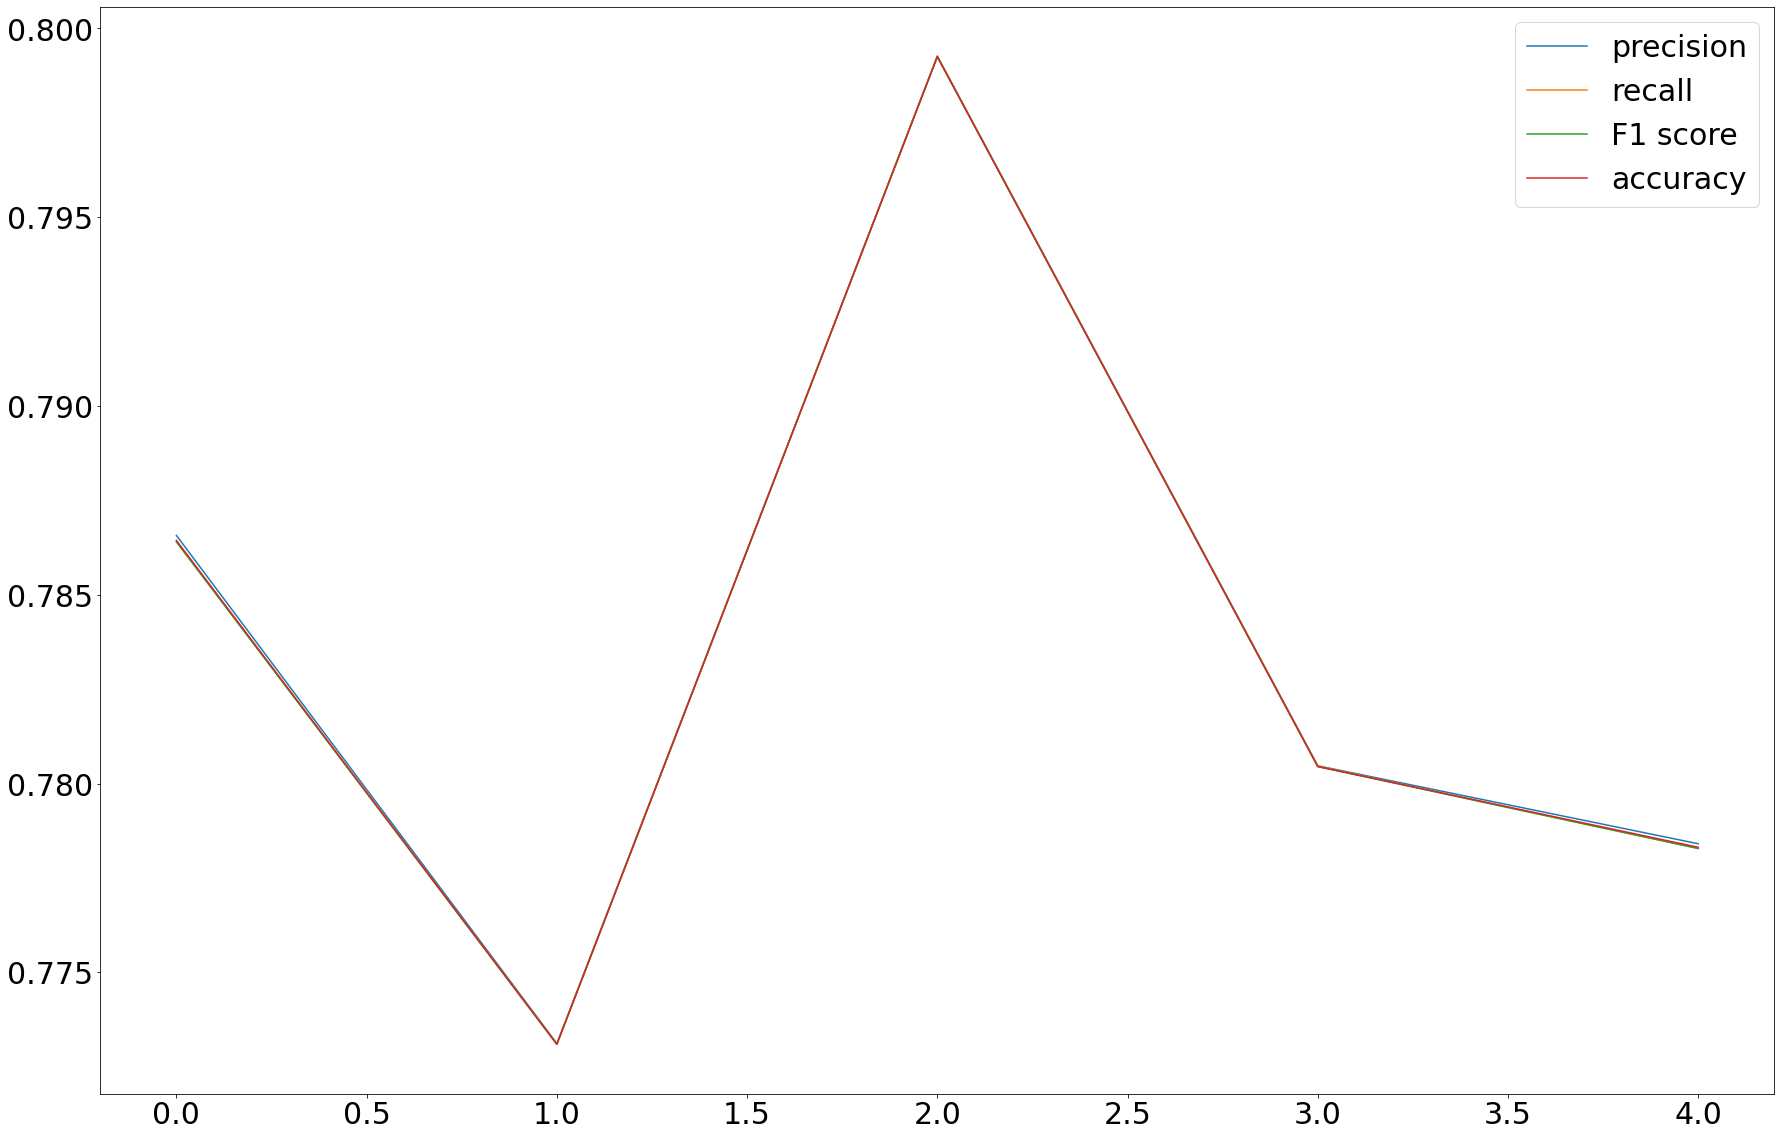

<Figure size 432x288 with 0 Axes>

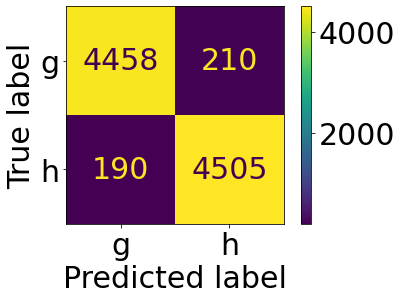

<Figure size 432x288 with 0 Axes>

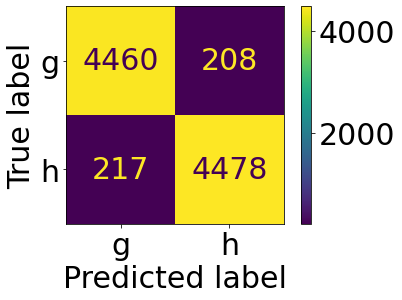

<Figure size 432x288 with 0 Axes>

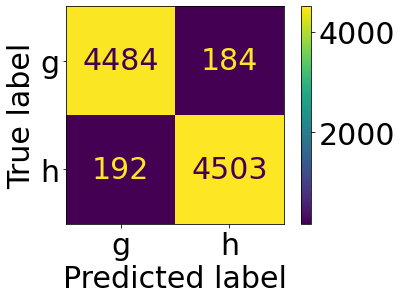

<Figure size 432x288 with 0 Axes>

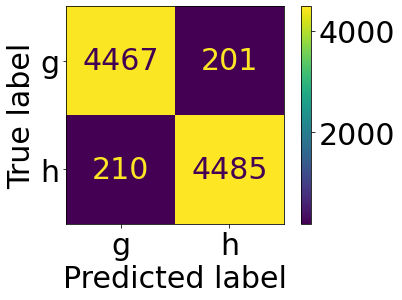

<Figure size 432x288 with 0 Axes>

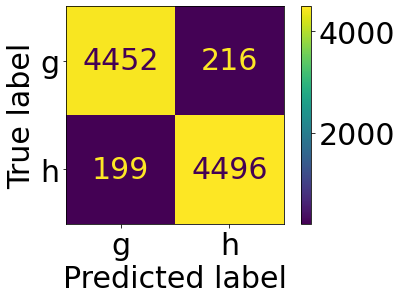

In [72]:
decision_tree = DecisionTreeClassifier().fit(X, Y)
estimators =  cross_validation(decision_tree, X, Y)